# Manually Scrape Data

In [1]:
import sys
sys.path.append("../modules/")
import scraper
from bs4 import BeautifulSoup

html = scraper.fetch_html("https://www.nytimes.com/")
soup = BeautifulSoup(html, 'html.parser')
soup = scraper.clean_html(soup)
soup = scraper.squash_nested_divs(soup)
tags = scraper.extract_tags(soup)

for i, tag in enumerate(tags):
    print(f'{i}: {tag}\n')

0: <a class="css-kgn7zc" href="#site-content">Skip to content</a>

1: <a class="css-kgn7zc" href="#site-index">Skip to site index</a>

2: <section class="css-9kr9i3 e1m0pzr42"><a aria-label="New York Times homepage" class="css-nhjhh0 ell52qj1" data-testid="masthead-mobile-logo" href="/"></a><ul class="css-5wt1bj" data-testid="masthead-edition-menu"><li class="css-vktqhz"><a aria-current="page" class="css-ogiugu" href="/" lang="en-US">U.S.</a></li><li class="css-1vlye70" data-testid="edition-menu-international"><a class="css-ogiugu" href="/international/" lang="en">International</a></li><li class="css-1vlye70" data-testid="edition-menu-canada"><a class="css-ogiugu" href="/ca/" lang="en-CA">Canada</a></li><li class="css-1vlye70" data-testid="edition-menu-spanish"><a class="css-ogiugu" href="https://www.nytimes.com/es/" lang="es-ES">Español</a></li><li class="css-1vlye70" data-testid="edition-menu-chinese"><a class="css-ogiugu" href="https://cn.nytimes.com" lang="zh-hans">中文</a></li></ul>

In [2]:
import pandas as pd

df = pd.DataFrame(tags)
df.columns = ['html']
df['is_article'] = 0
df['i'] = df.index
df.head(10)
print(len(df['html']))

398


In [3]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="story-wrapper")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 1
        
len(df[df['is_article']==1])

144

In [4]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="css-9mylee")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 1
        
len(df[df['is_article']==1])

184

In [5]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="css-1eh6y79")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 1
        
len(df[df['is_article']==1])

184

In [6]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="css-rgq5s4")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 2
        
len(df[df['is_article']==2])

8

In [12]:
df.loc[64:75, 'is_article'] = 0
df.loc[82:90, 'is_article'] = 0
df.loc[107, 'is_article'] = 0
df.loc[112, 'is_article'] = 0
df.loc[114, 'is_article'] = 0
df.loc[132, 'is_article'] = 0
df.loc[134, 'is_article'] = 0
df.loc[136:145, 'is_article'] = 0
df.loc[155:166, 'is_article'] = 0
df.loc[181:199, 'is_article'] = 0
df.loc[208:225, 'is_article'] = 0

In [13]:
total = 0
for i, item in enumerate(df.iterrows()):
    if df.loc[i, 'is_article'] == 1:
        total+=1
        print(f"{item[1]['i']}: {item[1]['html']}\n")
        
print(total)

11: <section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/aed11f56-1976-5204-a437-3f6052187112" href="https://www.nytimes.com/2024/01/06/business/alaska-airlines-flight-boeing-grounding.html"><p class="indicate-hover css-si8ren">F.A.A. Orders Airlines to Ground Some Boeing 737 Max 9 Jets After Emergency</p><p class="summary-class css-1dzhg71">An Alaska Airlines plane lost a chunk of its body on Friday, terrifying passengers. It then made an emergency landing at the Portland, Ore., airport.</p><p class="css-1esztn" data-ttr="1">6 min read</p></a><figure class="container-margin css-186xh9e"><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">The New York Times</span></figcaption></figure></section>

12: <a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/aed11f56-1976-5204-a437-3f6052187112" href="https://www.nytimes.com/2024/01/06/business/alaska-airlines-flight-boeing-grounding.html"><p class=

In [14]:
# del df['i']
# # # # df.head()
# df.to_csv("data/nyt.txt", index=False)

# Synthetically expand data

### Load Data


In [1]:
import pandas as pd
df = pd.read_csv('data/nyt.txt')
df.head()

,html,is_article
0,"<a class=""css-kgn7zc"" href=""#site-content"">Ski...",0
1,"<a class=""css-kgn7zc"" href=""#site-index"">Skip ...",0
2,"<section class=""css-9kr9i3 e1m0pzr42""><a aria-...",0
3,"<a aria-label=""New York Times homepage"" class=...",0
4,"<a aria-current=""page"" class=""css-ogiugu"" href...",0


### Analyze Data


TOTAL:  398
TOTAL POSITIVE:  108


<Axes: >

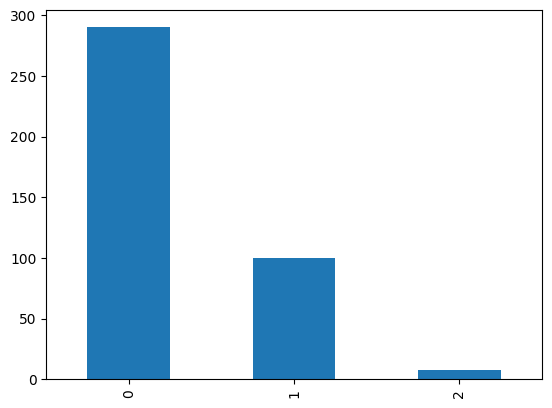

In [2]:
print("TOTAL: ", len(df))
print("TOTAL POSITIVE: ", len(df[df['is_article']>0]))
df['is_article'].value_counts().plot(kind='bar')

In [11]:
html = df[df.is_article == 1].sample(1).html.values[0]

In [12]:
html

'<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/c9551f43-1bc9-5380-bb79-113175a426a6" href="https://www.nytimes.com/2024/01/06/technology/smartphone-addiction-flip-phone.html"><p class="indicate-hover css-on97le">I Was Addicted to My Smartphone, So I Switched to a Flip Phone for a Month</p><p class="summary-class css-1hkeunz">Was it inconvenient? Yes. Did T9 texting drive me crazy? Definitely. Was it worth doing? Absolutely.</p><p class="css-1esztn" data-ttr="1">10 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A black flip phone, on its side, open, on a blue background." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A black flip phone, on its side, open, on a blue background." class="css-122y91a" src="https://static01.nyt.com/images/2024/01/07/multimedia/07FLIPPHONE-fvgb/07FLIPPHONE-fvgb-square640.jpg?for

In [13]:
new_data = [
    '<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/a1b2c3d4-5e6f-7g8h-9i0j-1k2l3m4n5o6p" href="https://www.example.com/2024/01/07/science/robotic-exploration-ocean-depths.html"><p class="indicate-hover css-on97le">Revolutionizing Oceanography: Robots Uncover Deep-Sea Secrets</p><p class="summary-class css-1hkeunz">Unprecedented exploration of the Mariana Trench reveals new species and ancient geology.</p><p class="css-1esztn" data-ttr="1">18 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="Underwater robotic vehicles exploring deep-sea terrain." class="css-dzl7b5" loading="lazy"/><noscript><img alt="Underwater robotic vehicles exploring deep-sea terrain." class="css-122y91a" src="https://www.example.com/images/2024/01/08/deepsea-robots.jpg"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Image by John Doe for Example News</span></figcaption></figure></a></section>',
    '<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/b2c3d4e5-6f7g-8h9i-0j1k-2l3m4n5o6p7q" href="https://www.example.com/2024/02/14/health/revolutionary-cancer-treatment.html"><p class="indicate-hover css-on97le">New Cancer Treatment Achieves 95% Success Rate in Early Trials</p><p class="summary-class css-1hkeunz">A groundbreaking approach to cancer treatment shows unprecedented success in eradicating tumors.</p><p class="css-1esztn" data-ttr="1">12 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="Medical researchers in a laboratory analyzing data." class="css-dzl7b5" loading="lazy"/><noscript><img alt="Medical researchers in a laboratory analyzing data." class="css-122y91a" src="https://www.example.com/images/2024/02/15/cancer-treatment-lab.jpg"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by Jane Smith for Example News</span></figcaption></figure></a></section>',
    '<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/c3d4e5f6-7g8h-9i0j-1k2l-3m4n5o6p7q8r" href="https://www.example.com/2024/03/22/technology/ai-ethical-framework.html"><p class="indicate-hover css-on97le">Global Summit Establishes First Universal Ethical Guidelines for AI</p><p class="summary-class css-1hkeunz">Leaders and experts from 50 nations convene to agree on foundational ethics for artificial intelligence.</p><p class="css-1esztn" data-ttr="1">20 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A diverse group of people in a conference room discussing documents." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A diverse group of people in a conference room discussing documents." class="css-122y91a" src="https://www.example.com/images/2024/03/23/ai-ethics-conference.jpg"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by Alex Johnson for Example News</span></figcaption></figure></a></section>',
    '<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/d4e5f6g7-8h9i-0j1k-2l3m-4n5o6p7q8r9s" href="https://www.example.com/2024/04/30/environment/endangered-species-recovery.html"><p class="indicate-hover css-on97le">Endangered Species Recovery: A Success Story for Conservation</p><p class="summary-class css-1hkeunz">Multiple species, once on the brink of extinction, now thriving thanks to global conservation efforts.</p><p class="css-1esztn" data-ttr="1">15 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A wildlife sanctuary with various animals roaming freely." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A wildlife sanctuary with various animals roaming freely." class="css-122y91a" src="https://www.example.com/images/2024/05/01/endangered-species.jpg"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Image by Sarah Lee for Example News</span></figcaption></figure></a></section>',
    '<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/e5f6g7h8-9i0j-1k2l-3m4n-5o6p7q8r9s0t" href="https://www.example.com/2024/05/15/education/global-literacy-initiative.html"><p class="indicate-hover css-on97le">Global Literacy Initiative: Educating the Next Generation</p><p class="summary-class css-1hkeunz">An international project aims to eradicate illiteracy and provide quality education to all children.</p><p class="css-1esztn" data-ttr="1">10 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="Children from various countries reading books in a bright classroom." class="css-dzl7b5" loading="lazy"/><noscript><img alt="Children from various countries reading books in a bright classroom." class="css-122y91a" src="https://www.example.com/images/2024/05/16/global-literacy.jpg"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by Michael Brown for Example News</span></figcaption></figure></a></section>'
]

In [14]:
for html in new_data:
    df.append({"html":html, 'is_article': 1}, ignore_index=True)

/tmp/ipykernel_30905/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_30905/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_30905/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_30905/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_30905/680166606.py:2: FutureWarning: The frame.append

In [ ]:
df.to_csv("data/nyt.txt")